In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Model

In [2]:
from matplotlib import pyplot as plt

In [3]:
model= VGG16()

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
sub_model= Model(inputs= model.inputs, outputs =  model.layers[3].output)

In [6]:
sub_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [7]:
img=load_img("img.jpg", target_size=(224,224))

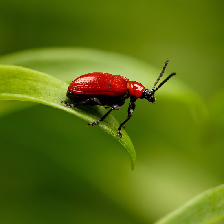

In [8]:
img

In [9]:
img=preprocess_input(img_to_array(load_img("img.jpg", target_size=(224,224))))
img.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


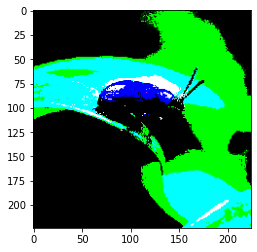

In [10]:
plt.imshow(img, cmap="gray");

In [11]:
from numpy import expand_dims
img= expand_dims(img, axis=0)


In [12]:
img.shape

(1, 224, 224, 3)

In [13]:
feature_maps= sub_model.predict(img)

1/1 [==============================] - 0s 114ms/step


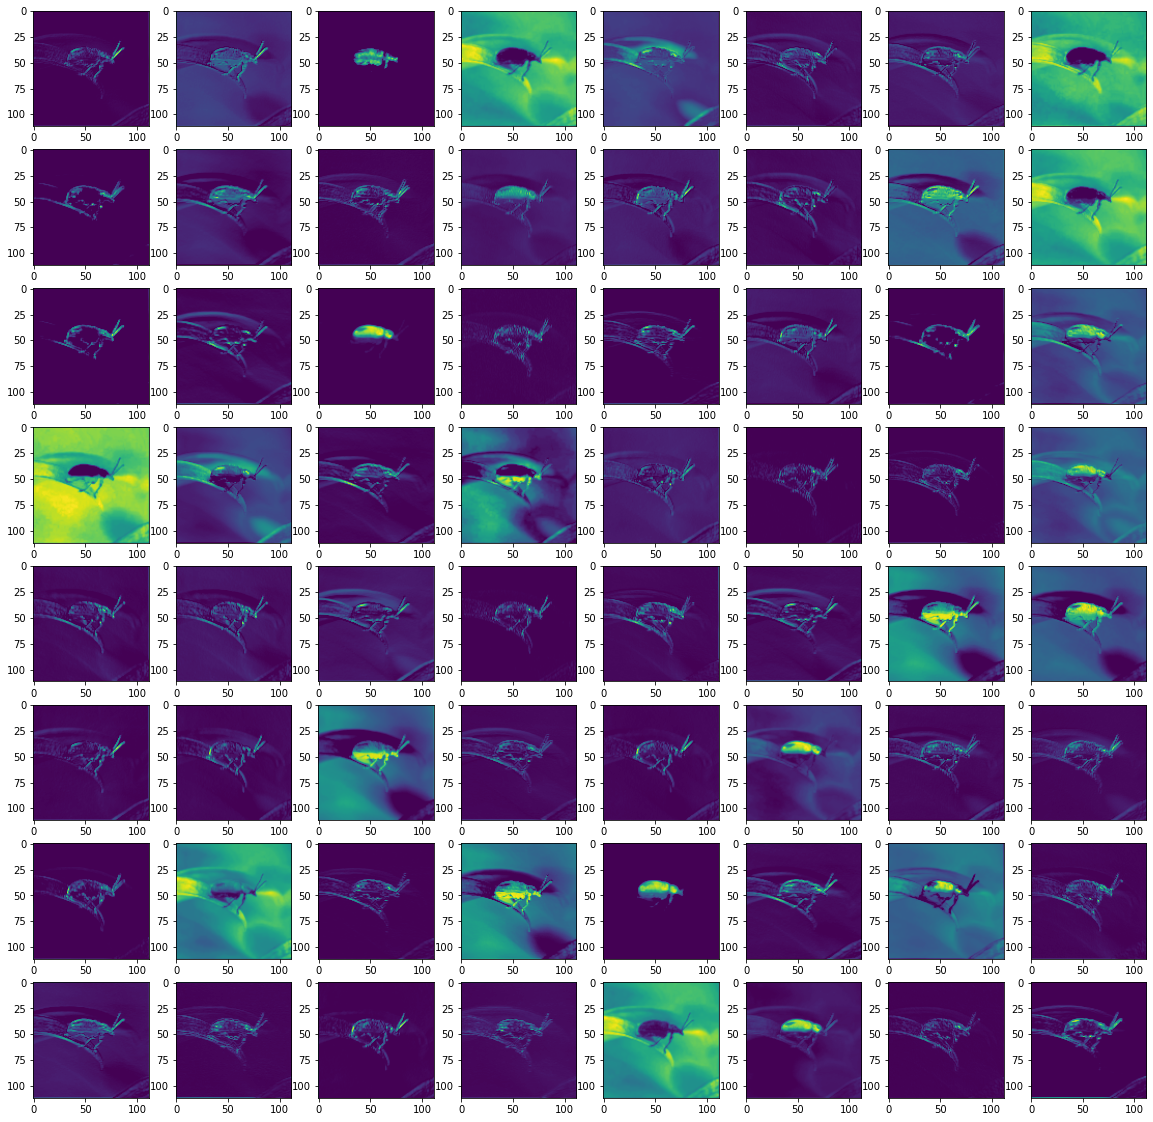

In [28]:
plt.figure(figsize=(20,20))
flag=1
for i in range(8):
    for i in range(8):
    
        ax =plt.subplot(8,8,flag)
        plt.imshow(feature_maps[0,:,:,flag-1])
        flag+=1

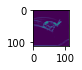

In [30]:
ax =plt.subplot(1,8,1)
plt.imshow(feature_maps[0,:,:,63])